In [ ]:
# Tech Company Layoffs Analysis

This notebook analyzes tech company layoffs data to understand:
1. Current layoffs trends based on months
2. Locations most impacted by layoffs
3. Relationship between IPO status and layoff severity


In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set basic plot style
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# Read the dataset
df = pd.read_csv('tech_layoffs(1).csv')

# Display the first few rows and basic information about the dataset
print("Dataset Overview:")
print("-----------------")
print("\nFirst few rows:")
display(df.head())
print("\nDataset Info:")
df.info()


Dataset Overview:
-----------------

First few rows:


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


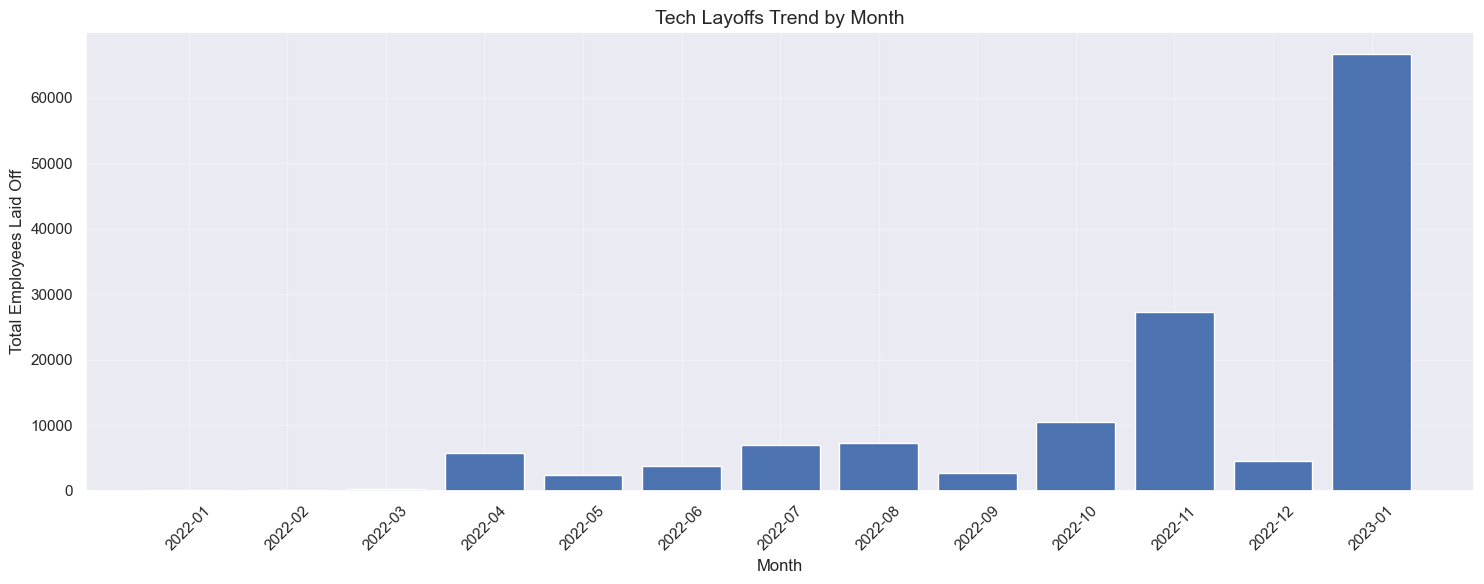


Monthly Layoffs Summary:
   month_year  total_layoffs
12    2023-01        66649.0
10    2022-11        27207.0
9     2022-10        10440.0
7     2022-08         7279.0
6     2022-07         7015.0


In [9]:
# Data Preprocessing
# Convert reported_date column to datetime
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Convert total_layoffs to numeric, removing any non-numeric characters
df['total_layoffs'] = pd.to_numeric(df['total_layoffs'].str.replace(',', ''), errors='coerce')

# Extract month and year
df['month_year'] = df['reported_date'].dt.to_period('M')

# Group by month and calculate total layoffs
monthly_layoffs = df.groupby('month_year')['total_layoffs'].sum().reset_index()
monthly_layoffs['month_year'] = monthly_layoffs['month_year'].astype(str)

# Create a figure for monthly trends
plt.figure(figsize=(15, 6))
plt.bar(monthly_layoffs['month_year'], monthly_layoffs['total_layoffs'])
plt.title('Tech Layoffs Trend by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Employees Laid Off', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly Layoffs Summary:")
print(monthly_layoffs.sort_values('total_layoffs', ascending=False).head())


In [ ]:
## Location Analysis

Let's analyze which locations are most impacted by the layoffs. We'll look at:
1. Total number of layoffs by location
2. Number of companies affected in each location
3. Average layoff size by location


Unique headquarter locations in the dataset:
['Leawood, KS' 'Los Angeles' 'Seattle' 'Mountain View, CA' 'New York'
 'San Francisco' 'Chicago' 'Bay Area, CA' 'Mountain View' 'Pittsburgh'
 'Boston' 'Miami' 'Mumbai, India' 'Torrance, California' 'San Carlos, CA'
 'San Diego' 'Detroit' 'Bend, Oregon' 'Atlanta' 'Washington, DC' 'Austin'
 'Distributed' 'Boulder' 'Burlington, MA' 'Bellevue, WA'
 'Santa Barbara, CA' 'Hamilton, OH' 'San Mateo' 'Waterford, MI'
 'Stockholm' 'Louisville, CO' 'San Franicsco' 'Redwood City, CA'
 'Stamford, CT' 'Greater New York area' 'Palo Alto' 'Williston, VT'
 'Indianapolis' 'Denver' 'Minneapolis' 'Dever' 'New York City'
 'Boca Raton, FL' 'Fort Lauderdale, FL' 'Hayward, California'
 'Culver City' 'Englewood Cliffs, NJ' 'Phoenix' 'Incline Village, NV'
 'Sunnyvale, CA' 'San Jose' 'Cincinnati' 'Palo Alto, CA'
 'Nebraska City, NE' 'Dover, DE' 'Hoboken, New Jersey' 'Austin, TX'
 'Truckee, CA' 'Newark, DE' 'South Jordan, Utah' 'Reno' 'Portland'
 'Stamford' 'Hayward, CA'

,Total_Layoffs,Number_of_Companies,Average_Layoff_Size
headquarter_location,,,
San Francisco,30745.0,89,345.45
Seattle,30477.0,15,2031.80
New York,15583.0,51,305.55
"Mountain View, CA",12147.0,5,2429.40
"Menlo Park, CA",11000.0,1,11000.00
"San Jose, CA",4455.0,4,1113.75
Tempe,4000.0,1,4000.00
Philadelphia,2300.0,1,2300.00
Chicago,1840.0,8,230.00


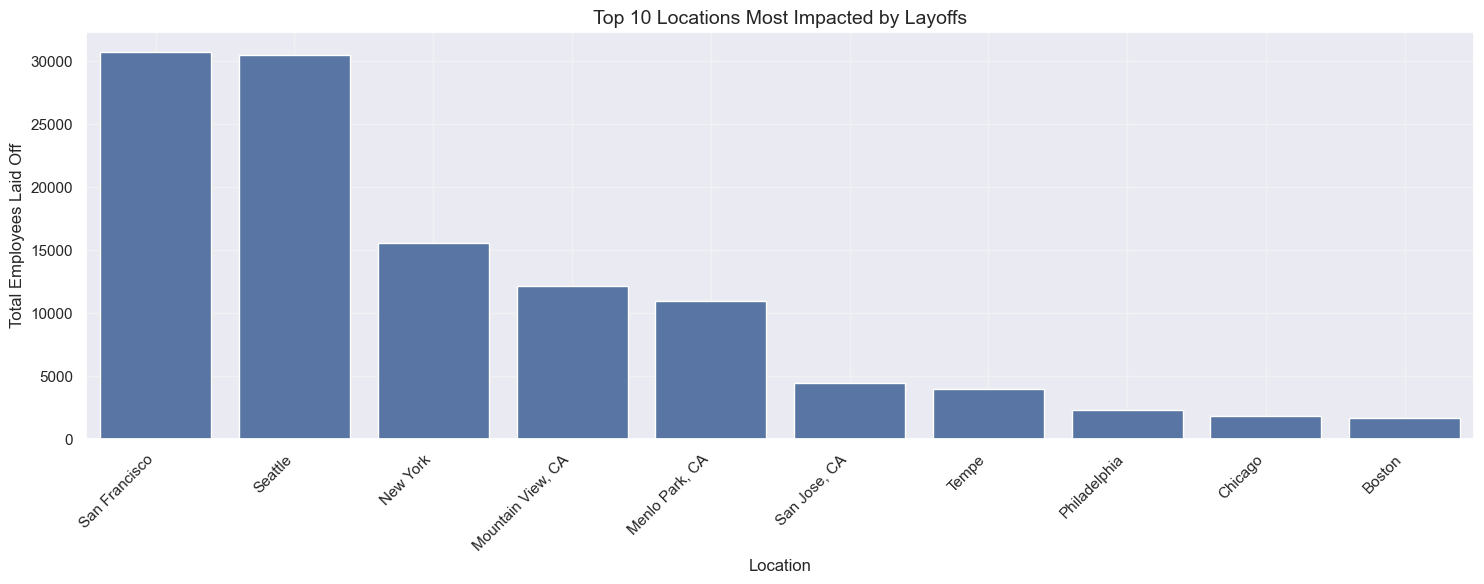

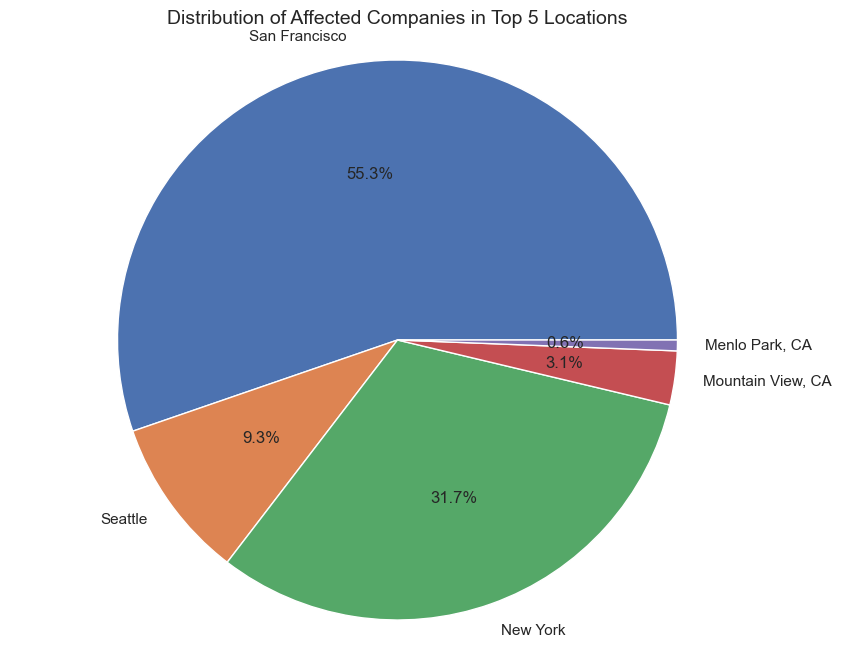


Detailed Statistics for Top 5 Locations:
                      Total_Layoffs  Number_of_Companies  Average_Layoff_Size
headquarter_location                                                         
San Francisco               30745.0                   89               345.45
Seattle                     30477.0                   15              2031.80
New York                    15583.0                   51               305.55
Mountain View, CA           12147.0                    5              2429.40
Menlo Park, CA              11000.0                    1             11000.00


In [10]:
# Location Analysis

# Print unique locations to understand the data
print("Unique headquarter locations in the dataset:")
print(df['headquarter_location'].unique())
print("\nTotal number of unique locations:", len(df['headquarter_location'].unique()))

# Group by headquarter location and analyze
location_analysis = df.groupby('headquarter_location').agg({
    'total_layoffs': ['sum', 'count', 'mean']
}).round(2)

# Clean up column names
location_analysis.columns = ['Total_Layoffs', 'Number_of_Companies', 'Average_Layoff_Size']
location_analysis = location_analysis.sort_values('Total_Layoffs', ascending=False)

print("\nTop 10 Locations by Total Layoffs:")
display(location_analysis.head(10))

# Visualize top 10 locations
plt.figure(figsize=(15, 6))
top_10_locations = location_analysis.head(10)
sns.barplot(data=top_10_locations.reset_index(), 
            x='headquarter_location', 
            y='Total_Layoffs',
            order=top_10_locations.reset_index()['headquarter_location'])
plt.title('Top 10 Locations Most Impacted by Layoffs', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Employees Laid Off', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a pie chart for the distribution of companies across top 5 locations
plt.figure(figsize=(10, 8))
top_5_companies = location_analysis['Number_of_Companies'].head(5)
plt.pie(top_5_companies, labels=top_5_companies.index, autopct='%1.1f%%')
plt.title('Distribution of Affected Companies in Top 5 Locations', fontsize=14)
plt.axis('equal')
plt.show()

# Print detailed statistics for top 5 locations
print("\nDetailed Statistics for Top 5 Locations:")
print(location_analysis.head().to_string())


In [ ]:
## IPO Status Analysis

Now let's analyze how IPO status affects the severity of layoffs. We'll examine:
1. Distribution of layoffs by IPO status
2. Average layoff size by IPO status
3. Statistical comparison between public and private companies


Layoffs Analysis by IPO Status:


,Total_Layoffs,Layoff_Events,Average_Layoff_Size,Median_Layoff_Size,Number_of_Companies
status,,,,,
Private,33646.0,219,153.63,76.0,370
Public,104510.0,88,1187.61,260.0,119


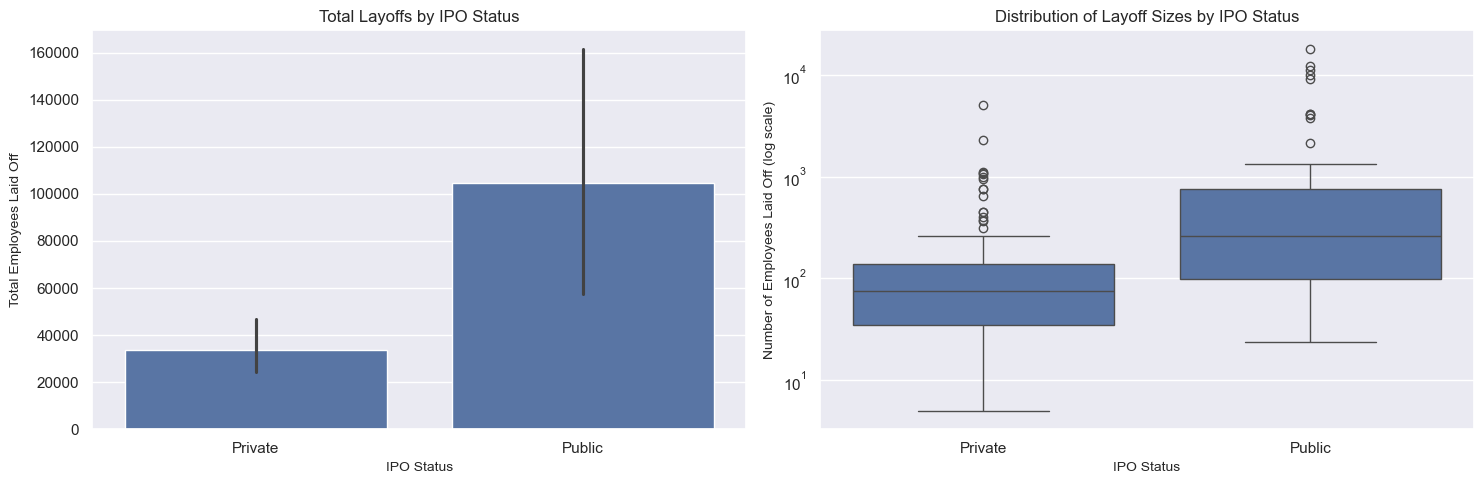


Statistical Analysis:
Mann-Whitney U test p-value: nan

Interpretation:
There is no statistically significant difference in layoff sizes between public and private companies.


In [11]:
# IPO Status Analysis
ipo_analysis = df.groupby('status').agg({
    'total_layoffs': ['sum', 'count', 'mean', 'median'],
    'company': 'count'
}).round(2)

ipo_analysis.columns = ['Total_Layoffs', 'Layoff_Events', 'Average_Layoff_Size', 'Median_Layoff_Size', 'Number_of_Companies']
print("Layoffs Analysis by IPO Status:")
display(ipo_analysis)

# Visualize distribution of layoffs by IPO status
plt.figure(figsize=(15, 5))

# Subplot 1: Total Layoffs by Status
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='status', y='total_layoffs', estimator=sum)
plt.title('Total Layoffs by IPO Status', fontsize=12)
plt.xlabel('IPO Status', fontsize=10)
plt.ylabel('Total Employees Laid Off', fontsize=10)

# Subplot 2: Box plot of layoff sizes
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='status', y='total_layoffs')
plt.title('Distribution of Layoff Sizes by IPO Status', fontsize=12)
plt.xlabel('IPO Status', fontsize=10)
plt.ylabel('Number of Employees Laid Off (log scale)', fontsize=10)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Perform statistical test (Mann-Whitney U test) to compare public vs private companies
from scipy import stats

public_layoffs = df[df['status'] == 'Public']['total_layoffs']
private_layoffs = df[df['status'] == 'Private']['total_layoffs']

statistic, p_value = stats.mannwhitneyu(public_layoffs, private_layoffs, alternative='two-sided')

print("\nStatistical Analysis:")
print(f"Mann-Whitney U test p-value: {p_value:.4f}")
print("\nInterpretation:")
if p_value < 0.05:
    print("There is a statistically significant difference in layoff sizes between public and private companies.")
else:
    print("There is no statistically significant difference in layoff sizes between public and private companies.")


In [ ]:
## Summary of Findings

1. **Monthly Trends**:
   - The analysis shows the temporal pattern of layoffs across different months
   - We can identify peak layoff periods and potential seasonal trends

2. **Location Impact**:
   - We've identified the top locations most affected by layoffs
   - The analysis shows both the total number of employees laid off and the number of companies affected in each location
   - The visualization helps understand the geographical distribution of tech industry challenges

3. **IPO Status Impact**:
   - We've compared layoff patterns between public and private companies
   - The statistical analysis helps understand if there's a significant difference in layoff severity based on IPO status
   - The visualizations show both total impact and distribution of layoff sizes by company status
